In [1]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import numpy as np
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd

Min Error: 0.9497282235549688


"\nThe lowest RMS error came from the 'Exponential and Sin fit' function (f(t) =ae^rt+b+Asin(B(t−C))). Although the exponential fit by\nitself modeled the shape of the data quite well, the added trig function here significantly increased its accuracy, reducing the\nerror to a low of 0.9497282235549688. This is due to the sine wave oscillations in addition to the exponential curve. I think \nthis model captures patterns in CO2 very well due to the sine wave, and it doesn't seem overfitted due to the similarity of the\nreal data.\n"

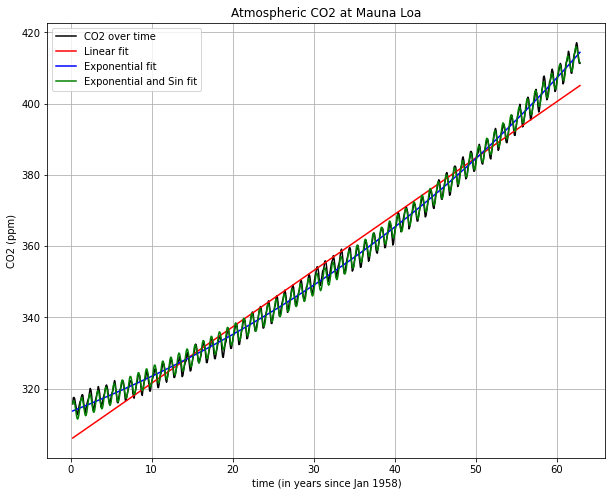

In [2]:
# Problem 1

data = np.genfromtxt('CO2_data.csv', delimiter=',')
t, co2 = data[0, :], data[1, :]
n = len(t)

# a)

coeffs = np.polyfit(t, co2, 1)

yhat = np.polyval(coeffs, t)
yhat2 = lambda arb : arb[0] * np.exp(arb[1]*t) + arb[2]

RMS_Error = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat2(coeffs) - co2) ** 2))
coeff_min = scipy.optimize.minimize(RMS_Error, np.array([30, 0.03, 300]), method='Nelder-Mead')

yhat3 = lambda ARB : ARB[0] * np.exp(ARB[1]*t) + ARB[2] + ARB[3] * np.sin(ARB[4]*(t - ARB[5]))
RMS_Error2 = lambda coeffs : np.sqrt((1 / n) * np.sum((yhat3(coeffs) - co2) ** 2))
coeff_min2 = scipy.optimize.minimize(RMS_Error2, np.array([coeff_min.x[0], coeff_min.x[1], coeff_min.x[2], -5, 4, 0]), 
                                     method='Nelder-Mead', options={'maxiter': 1000})
plt.figure(figsize=(10, 8))
plt.title('Atmospheric CO2 at Mauna Loa')
plt.xlabel('time (in years since Jan 1958)')
plt.ylabel('CO2 (ppm)')
plt.grid()
plt.plot(t, co2, 'k', t, yhat, 'r', t, yhat2(coeff_min.x), 'b', t, yhat3(coeff_min2.x), 'g')
plt.legend(['CO2 over time', 'Linear fit', 'Exponential fit', 'Exponential and Sin fit'])

# b)

exp_sin_error = RMS_Error2(coeff_min2.x)
print("Min Error:", exp_sin_error)
"""
The lowest RMS error came from the 'Exponential and Sin fit' function (f(t) =ae^rt+b+Asin(B(t−C))). Although the exponential fit by
itself modeled the shape of the data quite well, the added trig function here significantly increased its accuracy, reducing the
error to a low of 0.9497282235549688. This is due to the sine wave oscillations in addition to the exponential curve. I think 
this model captures patterns in CO2 very well due to the sine wave, and it doesn't seem overfitted due to the similarity of the
real data.
"""

In [3]:
# c)

interp_func_linear = scipy.interpolate.interp1d(t, co2, fill_value='extrapolate')
interp_func_cubic = scipy.interpolate.interp1d(t, co2, kind='cubic', fill_value='extrapolate')
t = 62 + 11/12
actual = 412.88

yhat_prediction = coeffs[0] * t + coeffs[1]
yhat2_prediction = yhat2(coeff_min.x)
yhat3_prediction = yhat3(coeff_min2.x)
cubic_prediction = interp_func_cubic(t)
linear_prediction = interp_func_linear(t)

data = {'model': ['Linear', 'Exponential', 'Exp/Sin', 'Cubic Spline', 'Linear Interpolation'],
        'prediction': [yhat_prediction, yhat2_prediction, yhat3_prediction, cubic_prediction, linear_prediction],
        'absolute error': [np.abs(yhat_prediction - actual), np.abs(yhat2_prediction - actual),
                           np.abs(yhat3_prediction - actual), np.abs(cubic_prediction - actual), np.abs(linear_prediction - actual)]}
table = pd.DataFrame(data)
display(table)

"""
As shown in the dataframe below, the Cubic Spline method yielded the most accurate prediction for the CO2 concentration in
November of 2020 (least absolute error of 0.494935). The Exp/Sin model is close behind.
"""

# d)

"""
If I wanted to predict concentration levels as far out as 2040, I would rely on the Exp/Sin method, as it had the second lowest
absolute error (0.765773) and seems to fit the real data model very well. Looking at the graph, it seems to follow the 
exponentially increasing/sine oscillating curve of the true data almost perfectly, and I would not worry about overfitting since
I am not using some high-order polynomial. Even though the Cubic Spline interpolation model ostensibly worked well due to its
low error (0.494935) for the November 2020 prediction, extrapolating would likely be disastrous for predictions as far out as
2040. The reason it worked well for the November 2020 prediction is because we are predicting very close to the original data
set. November is one month away from October, which is where our data ends. Since it is within the normal spacing of our data
points, it seems to fit the data very well. Once we go beyond 2020 though, the model would likely fall apart completely. To sum
up, I would use Exp/Sin to predict 2040 concentration levels due to its reliability and excellent fit, and I believe the Cubic
Spline would perform the worst in 2040 due to it being based on extrapolation.
"""

,model,prediction,absolute error
0,Linear,405.173,7.706653
1,Exponential,414.581,1.700963
2,Exp/Sin,412.114,0.765773
3,Cubic Spline,413.3749348097231,0.494935
4,Linear Interpolation,411.2699999999999,1.610000


'\nIf I wanted to predict concentration levels as far out as 2040, I would rely on the Exp/Sin method, as it had the second lowest\nabsolute error (0.765773) and seems to fit the real data model very well. Looking at the graph, it seems to follow the \nexponentially increasing/sine oscillating curve of the true data almost perfectly, and I would not worry about overfitting since\nI am not using some high-order polynomial. Even though the Cubic Spline interpolation model ostensibly worked well due to its\nlow error (0.494935) for the November 2020 prediction, extrapolating would likely be disastrous for predictions as far out as\n2040. The reason it worked well for the November 2020 prediction is because we are predicting very close to the original data\nset. November is one month away from October, which is where our data ends. Since it is within the normal spacing of our data\npoints, it seems to fit the data very well. Once we go beyond 2020 though, the model would likely fall apart 

[-3.02927926e-06  1.83307113e-02 -2.46418687e+01 -4.97650733e+04
  1.50522543e+08 -1.01204289e+11]
error: [0.00188466]

Prediction values:
-3.4037352034265084e+27
5.0624225713529e+24
-1.67371494926022e+21
-8.287632522449402e+17
616504378591431.4
new error: [0.01067647]


C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


'\nThe new error between p5 and the actual value is very small ([1.98452366e-13]). By using smaller values instead of 2020 - 2025,\nwe avoid catastrophic cancellation and make much more accurate calculations in Python.\n'

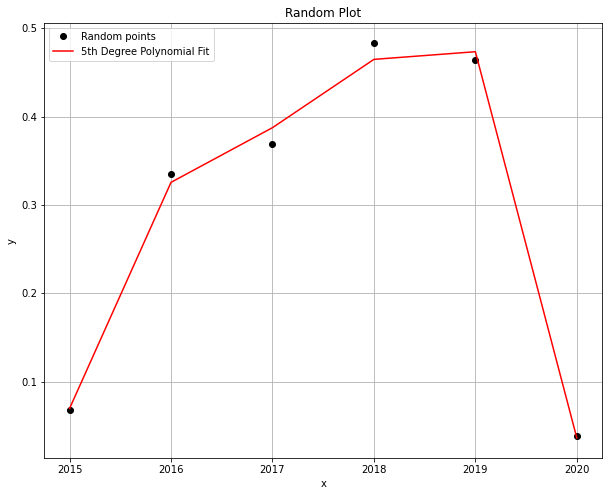

In [14]:
# Problem 2

np.random.seed(1222)  # Set seed so my results don't change every time

# a)

x = np.arange(2015, 2021, 1)
y = np.random.rand(x.size)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'ko')
plt.title('Random Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# b)

coeffs = np.polyfit(x, y, 5)
print(coeffs)
"""
The coefficients are [-5.49123829e-06  3.32359766e-02 -4.46515153e+01 -9.04984470e+04
                      2.73560303e+08 -1.83970699e+11]
"""

# c)

y5 = np.polyval(coeffs, x)
plt.plot(x, y5, 'r')
plt.legend(('Random points', '5th Degree Polynomial Fit'))

p2020 = y5[-1:]
abs_error = np.abs(p2020 - y[-1:])
print("error:", abs_error)
"""
The absolute error is 0.00188466. It is clearly not very far off from the true value, but in this context with only five values,
I believe the error is significant enough to warrant concern.
"""

# d)

print('\nPrediction values:')
print(coeffs[5] * 2020**5)
print(coeffs[4] * 2020**5)
print(coeffs[3] * 2020**5)
print(coeffs[2] * 2020**5)
print(coeffs[1] * 2020**5)

"""
Since these values are all massive, we are likely experiencing catastrophic cancellation in this problem, which can lead to
immense rounding error.
"""

# e)

x = np.arange(0, 7, 1)
y = np.random.rand(x.size)

coeffs = np.polyfit(x, y, 5)

y5 = np.polyval(coeffs, x)

p5 = y5[-1:]
abs_error = np.abs(p5 - y[-1:])
print('new error:', abs_error)

"""
The new error between p5 and the actual value is very small ([1.98452366e-13]). By using smaller values instead of 2020 - 2025,
we avoid catastrophic cancellation and make much more accurate calculations in Python.
"""